In [0]:
import tensorflow

In [2]:
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [3]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


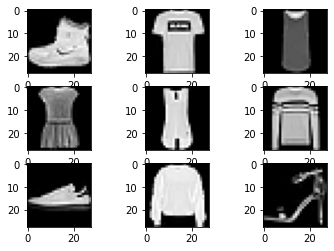

In [4]:
from matplotlib import pyplot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [0]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [6]:
x_train.shape

(60000, 28, 28, 1)

In [7]:
x_test.shape

(10000, 28, 28, 1)

In [8]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [0]:
import keras
import numpy as np
from keras.utils import np_utils
num_classes=len(np.unique(y_train))
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)


In [11]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
(x_train,x_valid)=x_train[7000:],x_train[:7000]

(y_train,y_valid)=y_train[7000:],y_train[:7000]

In [14]:
print('x_train shape:',x_train.shape)

print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')
print(x_valid.shape[0],'validation samples')
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

x_train shape: (53000, 28, 28, 1)
53000 train samples
10000 test samples
7000 validation samples


In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
reg=None
num_filters=32
ac='relu'
adm=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt=adm
drop_dense=0.3
drop_conv=0.2
img_rows, img_cols,channels =32,32,3 

model = Sequential()

model.add(Convolution2D(num_filters, (3, 3), activation=ac, kernel_regularizer=reg, input_shape=(28, 28, 1),padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Convolution2D(num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Dropout(0.25))

model.add(Convolution2D(2*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Convolution2D(2*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))  
model.add(Dropout(0.25))

model.add(Convolution2D(3*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Convolution2D(3*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Dropout(0.25))

model.add(Convolution2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Convolution2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation=ac,kernel_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_24 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_25 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 64)       

In [28]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)
x_train.shape

(53000, 28, 28, 1)

In [29]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
from keras.callbacks import ModelCheckpoint
checkpointer=ModelCheckpoint(filepath='Convolutional.hdf5',verbose=1,save_best_only=True)
hist=model.fit_generator(datagen.flow(x_train,y_train,batch_size=32),epochs=50,validation_data=(x_valid,y_valid),callbacks=[checkpointer],verbose=1)

Epoch 1/50
1657/1657 [==============================] - 52s 31ms/step - loss: 0.8808 - accuracy: 0.6909 - val_loss: 0.4418 - val_accuracy: 0.8296

Epoch 00001: val_loss improved from inf to 0.44176, saving model to Convolutional.hdf5
Epoch 2/50
1657/1657 [==============================] - 51s 31ms/step - loss: 0.5489 - accuracy: 0.7989 - val_loss: 0.4027 - val_accuracy: 0.8513

Epoch 00002: val_loss improved from 0.44176 to 0.40271, saving model to Convolutional.hdf5
Epoch 3/50
1657/1657 [==============================] - 50s 30ms/step - loss: 0.4688 - accuracy: 0.8315 - val_loss: 0.3255 - val_accuracy: 0.8767

Epoch 00003: val_loss improved from 0.40271 to 0.32554, saving model to Convolutional.hdf5
Epoch 4/50
1657/1657 [==============================] - 50s 30ms/step - loss: 0.4193 - accuracy: 0.8503 - val_loss: 0.3733 - val_accuracy: 0.8643

Epoch 00004: val_loss did not improve from 0.32554
Epoch 5/50
1657/1657 [==============================] - 50s 30ms/step - loss: 0.3975 - accur

In [30]:
model.load_weights('Convolutional.hdf5')                  #using load_weights function 
score=model.evaluate(x_test,y_test,verbose=1)               #evaluates the model
accuracy=100*score[1]                                       
print('Test accuracy is %.4f%%' % accuracy)                 #returns the accuracy of the model 

10000/10000 [==============================] - 2s 171us/step
Test accuracy is 93.1900%


In [35]:
model.load_weights('Convolutional.hdf5')                  #using load_weights function 
score=model.evaluate(x_train,y_train,verbose=1)               #evaluates the model
accuracy=100*score[1]                                       
print('Test accuracy is %.4f%%' % accuracy)                 #returns the accuracy of the model 

53000/53000 [==============================] - 9s 163us/step
Test accuracy is 95.0396%


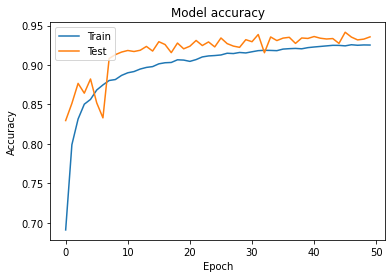

In [31]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

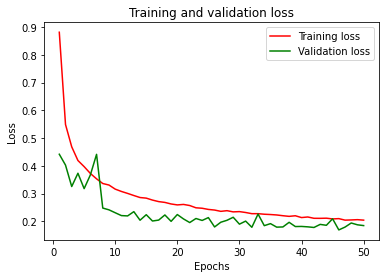

In [34]:
import matplotlib.pyplot as plt
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()